<a href="https://colab.research.google.com/github/mookpreeyanuch/dusty_squirrel/blob/master/Basic_Pandas_DigimonDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Load data

In [0]:
#https://drive.google.com/open?id=1tltwco2WkDMXnyhmUOz5FDG0P7X42VbF
file_id='1tltwco2WkDMXnyhmUOz5FDG0P7X42VbF'
link='https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)
df = pd.read_csv(csv_url)

In [4]:
df.head()

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,590.0,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,950.0,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,870.0,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,690.0,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,540.0,98,54,59,95,86


#### Count NA/NaN values in each column 

In [5]:
df.isna().sum()

Number         0
Digimon        0
Stage          3
Type           4
Attribute      0
Memory         0
Equip Slots    0
Lv 50 HP       4
Lv50 SP        0
Lv50 Atk       0
Lv50 Def       0
Lv50 Int       0
Lv50 Spd       0
dtype: int64

### Fill missing values with mode

In [0]:
for col in df.columns:
  col_mode = df[col].mode()[0]
  df[col] = df[col].fillna(col_mode)

In [7]:
df.isna().sum()

Number         0
Digimon        0
Stage          0
Type           0
Attribute      0
Memory         0
Equip Slots    0
Lv 50 HP       0
Lv50 SP        0
Lv50 Atk       0
Lv50 Def       0
Lv50 Int       0
Lv50 Spd       0
dtype: int64

### Show descriptive or summary statistics

In [8]:
df.describe()

,Number,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,125.000000,11.987952,1.574297,1219.759036,109.779116,124.518072,116.377510,112.638554,120.401606
std,72.024301,6.616501,0.854012,325.290103,32.454115,45.639372,32.132696,41.562888,32.633339
min,1.000000,2.000000,0.000000,530.000000,50.000000,52.000000,59.000000,50.000000,61.000000
25%,63.000000,6.000000,1.000000,990.000000,84.000000,89.000000,93.000000,79.000000,92.000000
50%,125.000000,12.000000,1.000000,1180.000000,104.000000,119.000000,113.000000,104.000000,119.000000
75%,187.000000,18.000000,2.000000,1480.000000,132.000000,153.000000,138.000000,138.000000,143.000000
max,249.000000,25.000000,3.000000,2080.000000,203.000000,318.000000,213.000000,233.000000,218.000000


### Count the number of digimon

In [9]:
df['Stage'].value_counts()

Mega           77
Ultimate       58
Champion       52
Rookie         37
In-Training    11
Ultra           6
Baby            5
Armor           3
Name: Stage, dtype: int64

### Show average digimon's status

In [10]:
df.groupby(by='Type').mean().iloc[:,3:]

,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
Type,,,,,,
Data,1198.833333,113.600000,120.366667,117.150000,118.966667,124.716667
Free,1068.235294,92.882353,114.000000,96.764706,87.323529,108.058824
Vaccine,1241.594203,115.521739,128.521739,120.275362,118.289855,128.840580
Virus,1276.744186,109.186047,128.360465,120.465116,113.697674,115.500000


### Sort the dataframe by HP

In [11]:
df.sort_values(by='Lv 50 HP', ascending=False).head()

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
178,179,Gankoomon,Mega,Data,Fire,22,1,2080.0,90,188,163,109,138
133,134,ShogunGekomon,Ultimate,Virus,Water,12,2,1980.0,96,113,113,99,97
245,246,ShineGreymon BM,Mega,Vaccine,Fire,22,2,1980.0,114,228,104,84,168
193,194,Titamon,Mega,Virus,Earth,18,3,1930.0,99,183,128,114,129
187,188,ShineGreymon,Mega,Vaccine,Light,20,2,1880.0,114,203,109,84,158


### Select only the virus digimons

In [0]:
sel_index = (df['Type'] == 'Virus')

In [13]:
df[sel_index]

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
12,13,Yokomon,In-Training,Virus,Plant,3,0,1480.0,64,82,82,75,69
13,14,Bukamon,In-Training,Virus,Water,3,0,830.0,93,54,74,103,69
17,18,Agumon (Blk),Rookie,Virus,Fire,5,1,1020.0,56,124,108,56,85
19,20,Impmon,Rookie,Virus,Dark,5,1,530.0,114,83,65,114,102
21,22,Otamamon,Mega,Virus,Water,4,1,930.0,105,52,75,113,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,Belphemon RM,Ultra,Virus,Dark,25,0,1780.0,84,247,168,109,140
236,237,Lucemon SM,Ultra,Virus,Dark,25,0,1490.0,173,89,124,233,158
240,241,Kerpymon (Blk),Mega,Virus,Dark,20,1,1290.0,188,94,94,223,153
241,242,Beelzemon BM,Mega,Virus,Dark,25,1,1680.0,114,238,124,104,178


### Create a new column called total_status

In [14]:
df.columns

Index(['Number', 'Digimon', 'Stage', 'Type', 'Attribute', 'Memory',
       'Equip Slots', 'Lv 50 HP', 'Lv50 SP', 'Lv50 Atk', 'Lv50 Def',
       'Lv50 Int', 'Lv50 Spd'],
      dtype='object')

In [0]:
status_cols = ['Lv50 SP', 'Lv50 Atk', 'Lv50 Def', 'Lv50 Int', 'Lv50 Spd']

df['total_status'] = 0
for col in status_cols:
  df['total_status'] += df[col]

In [16]:
df.head()

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd,total_status
0,1,Kuramon,Baby,Free,Neutral,2,0,590.0,77,79,69,68,95,388
1,2,Pabumon,Baby,Free,Neutral,2,0,950.0,62,76,76,69,68,351
2,3,Punimon,Baby,Free,Neutral,2,0,870.0,50,97,87,50,75,359
3,4,Botamon,Baby,Free,Neutral,2,0,690.0,68,77,95,76,61,377
4,5,Poyomon,Baby,Free,Neutral,2,0,540.0,98,54,59,95,86,392


### Plot graph

#### Histrogram

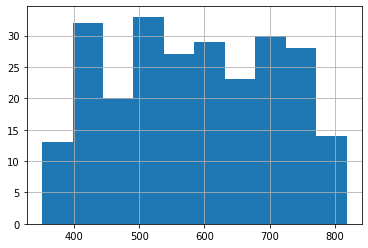

In [17]:
df['total_status'].hist()

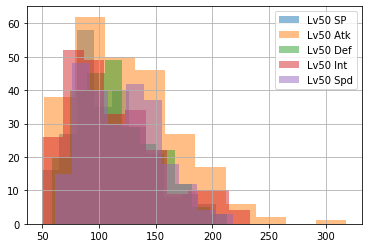

In [18]:
for col in status_cols:
  df[col].hist(alpha=0.5)

plt.legend(status_cols)
plt.show()

#### Scatter plot

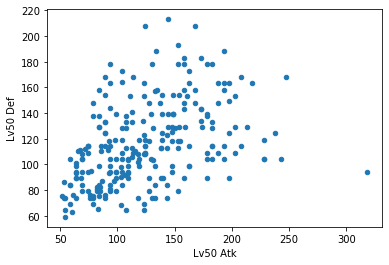

In [19]:
df.plot.scatter(x='Lv50 Atk', y='Lv50 Def')

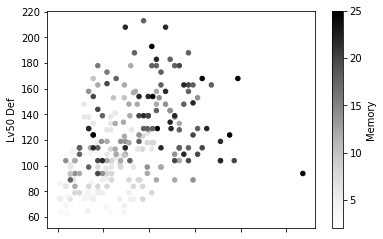

In [20]:
df.plot.scatter(x='Lv50 Atk', y='Lv50 Def', c='Memory')

#### Box plot

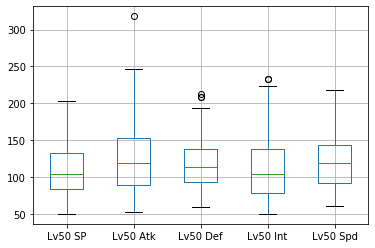

In [21]:
df[status_cols].boxplot()

#### Bar plot

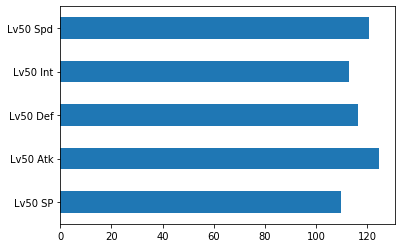

In [22]:
df[status_cols].mean().plot.barh()

### Merge table

In [0]:
df2 = df.groupby(by='Attribute').mean().reset_index()
df2 = df2[['Attribute', 'Memory']]
df2.columns = ['Attribute', 'AvgMemory']

In [24]:
df2

,Attribute,AvgMemory
0,Dark,14.540541
1,Earth,10.541667
2,Electric,12.160000
3,Fire,11.000000
4,Light,14.827586
5,Neutral,10.785714
6,Plant,9.760000
7,Water,10.833333
8,Wind,12.125000


In [0]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
merge_df = pd.merge(df, df2, on='Attribute', how='left')

In [26]:
merge_df.sample(10)

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd,total_status,AvgMemory
100,101,BlackGatomon,Champion,Virus,Dark,8,1,690.0,133,84,84,133,118,552,14.540541
220,221,Machinedramon,Mega,Virus,Electric,18,3,1240.0,114,173,183,128,124,722,12.160000
43,44,Biyomon,Rookie,Vaccine,Wind,4,1,830.0,93,85,79,85,91,433,12.125000
216,217,Mastemon,Mega,Vaccine,Neutral,22,1,1340.0,144,173,134,173,149,773,10.785714
208,209,PrinceMamemon,Mega,Data,Neutral,16,3,1630.0,137,104,173,109,130,653,10.785714
193,194,Titamon,Mega,Virus,Earth,18,3,1930.0,99,183,128,114,129,653,10.541667
140,141,Piximon,Ultimate,Data,Light,12,2,990.0,123,104,104,134,153,618,14.827586
0,1,Kuramon,Baby,Free,Neutral,2,0,590.0,77,79,69,68,95,388,10.785714
37,38,Dorumon,Rookie,Data,Neutral,5,1,1020.0,65,128,79,56,101,429,10.785714
32,33,Syakomon,Rookie,Virus,Water,4,1,870.0,100,53,86,112,78,429,10.833333
